<a href="https://colab.research.google.com/github/Elifemir/uk-crime-data-analysis/blob/main/EssexCrimeDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EssexCrimeData.zip to EssexCrimeData.zip


In [2]:
!unzip EssexCrimeData.zip -d EssexCrimeData

Archive:  EssexCrimeData.zip
  inflating: EssexCrimeData/2024-03/2024-03-essex-street.csv  
  inflating: EssexCrimeData/2024-04/2024-04-essex-street.csv  
  inflating: EssexCrimeData/2024-05/2024-05-essex-street.csv  
  inflating: EssexCrimeData/2024-06/2024-06-essex-street.csv  
  inflating: EssexCrimeData/2024-07/2024-07-essex-street.csv  
  inflating: EssexCrimeData/2024-08/2024-08-essex-street.csv  
  inflating: EssexCrimeData/2024-09/2024-09-essex-street.csv  
  inflating: EssexCrimeData/2024-10/2024-10-essex-street.csv  
  inflating: EssexCrimeData/2024-11/2024-11-essex-street.csv  
  inflating: EssexCrimeData/2024-12/2024-12-essex-street.csv  
  inflating: EssexCrimeData/2025-01/2025-01-essex-street.csv  
  inflating: EssexCrimeData/2025-02/2025-02-essex-street.csv  
  inflating: EssexCrimeData/2025-03/2025-03-essex-street.csv  


In [3]:
import pandas as pd
import glob

# Find all CSV files within subdirectories
csv_files = glob.glob("EssexCrimeData/**/*.csv", recursive=True)

# Read each CSV and add it to a list
dataframes = []
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Check the shape (rows, columns) and column names
print("Total number of rows:", combined_df.shape[0])
print("Column names:", combined_df.columns.tolist())

# Show the first 5 rows of the combined data
combined_df.head()


Total number of rows: 169292
Column names: ['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category', 'Context']


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,554ec3ac11cea663ceafbf01dc303f05ea6110ef5b1f98...,2024-12,Essex Police,Essex Police,0.721910,52.030484,On or near Middleton Road,E01029919,Babergh 007G,Burglary,Investigation complete; no suspect identified,NaN
1,27cf8b06605f7b7d03780bbcd7e5394fc6019bfc5c1361...,2024-12,Essex Police,Essex Police,0.873100,51.970566,On or near Court Street,E01029906,Babergh 009D,Violence and sexual offences,Unable to prosecute suspect,NaN
2,e853a0c4b609a2f2ce6032edf37146dad637bb9f1416aa...,2024-12,Essex Police,Essex Police,0.440900,51.639968,On or near Martingale Road,E01021237,Basildon 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
3,7a0808ab1d2fc1bb0d08c02e8d2c4c2cf1658f560a0635...,2024-12,Essex Police,Essex Police,0.435461,51.637725,On or near Shire Close,E01021237,Basildon 001A,Vehicle crime,Investigation complete; no suspect identified,NaN
4,d54c9d17c23e7a0a800127320072d64b8c951ebbaba5c2...,2024-12,Essex Police,Essex Police,0.439614,51.639167,On or near Smythe Road,E01021237,Basildon 001A,Vehicle crime,Investigation complete; no suspect identified,NaN


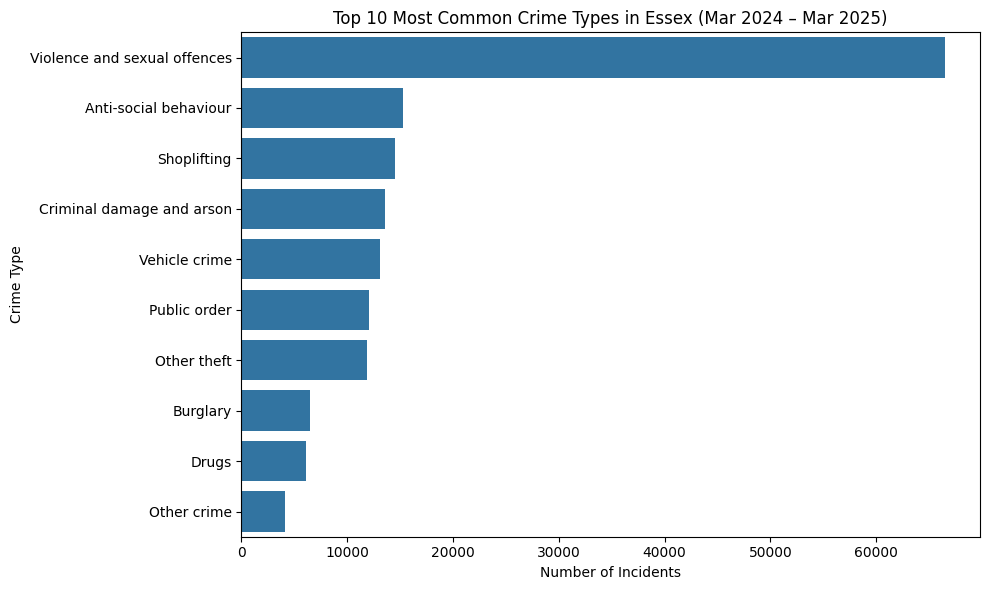

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find top 10 most frequent crime types
top_crimes = combined_df["Crime type"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title("Top 10 Most Common Crime Types in Essex (Mar 2024 – Mar 2025)")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()

This chart shows the top 10 most reported crime types in Essex over a 1-year period.

It helps identify which types of incidents are most frequent.

Useful for policy-makers, public safety planning, and awareness.



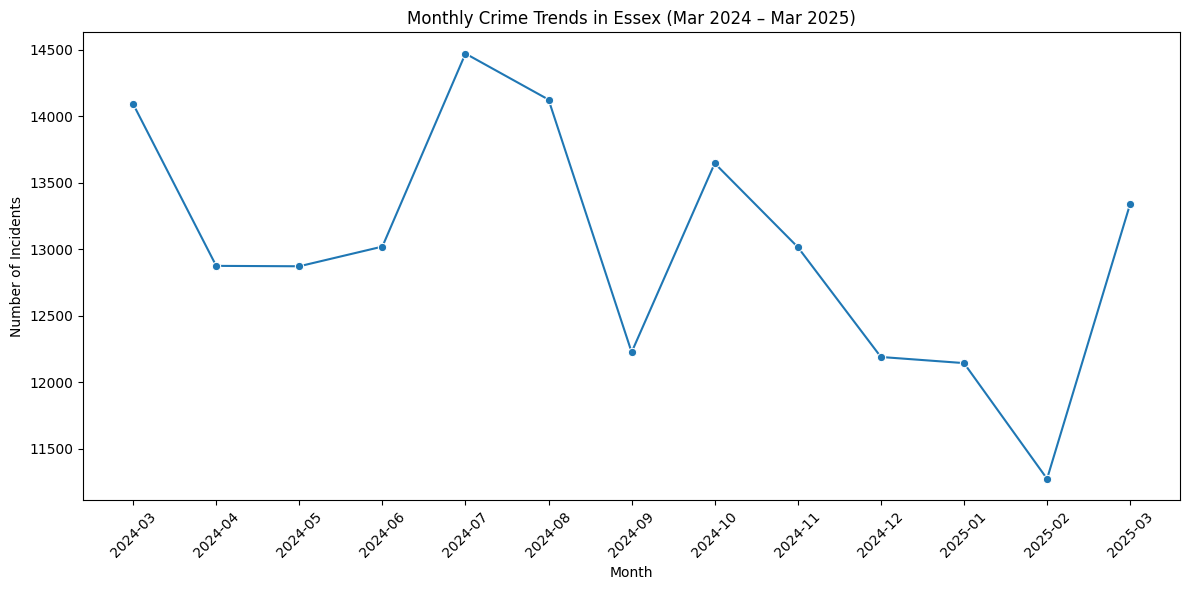

In [7]:
# Group by 'Month' and count incidents
monthly_counts = combined_df.groupby("Month").size().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Monthly Crime Trends in Essex (Mar 2024 – Mar 2025)")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

How crime levels change over time from March 2024 to March 2025.

You can visually spot spikes (high-crime months) and drops.

It’s useful for identifying seasonal patterns or unusual periods.

**Monthly Trend for a Specific Crime Type ("Burglary")**

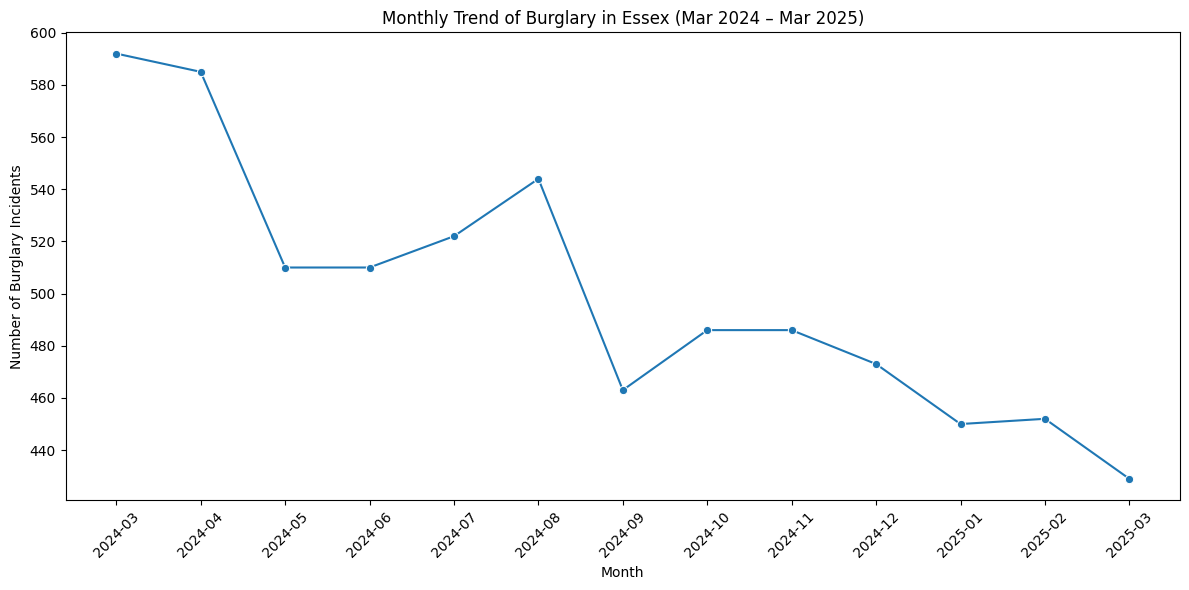

In [8]:
# Filter the dataset for "Burglary" crime type
burglary_df = combined_df[combined_df["Crime type"] == "Burglary"]

# Group the data by month and count the number of incidents
burglary_by_month = burglary_df.groupby("Month").size().sort_index()

# Plot the monthly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=burglary_by_month.index, y=burglary_by_month.values, marker="o")
plt.title("Monthly Trend of Burglary in Essex (Mar 2024 – Mar 2025)")
plt.xlabel("Month")
plt.ylabel("Number of Burglary Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart displays how burglary incidents change over time.

It helps identify months with peaks or drops in burglary cases.

You can adapt the code for other crime types by changing "Burglary" to e.g. "Drugs" or "Violence and sexual offences".